# Casinos, gamble and Markov chains: Parrondo's Paradox!
* Luiz Fernando Santos 

Whole text avaliable at https://lfrusso.github.io/statistics/linalg/computing/2020/08/10/testing-images.html


In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

np.random.seed(seed=1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


First of all, let's start by visualizing the expected result for a given game with a probability of winning $P$.

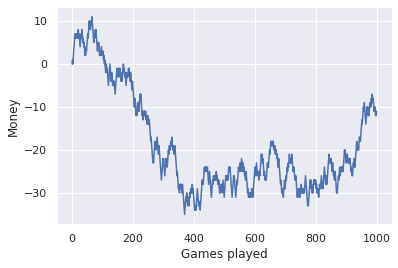

In [2]:
P = 0.5
N_PLAYS = 1000

# Let's see what happens during a game with P = 50%:

## Start by defining the player's balance (starting with 0 for simplicity)
balance = 0
## This vector will be used for plotting latter
balance_v = np.zeros(N_PLAYS)

for i in range(N_PLAYS):
  balance_v[i] = balance
  if (P > np.random.uniform(low=0.0, high=1.0)):
    balance += 1
  else:
    balance -= 1

# Now lets plot it and see the end result:
x = np.arange(N_PLAYS)
plt.plot(x, balance_v)
plt.xlabel("Games played")
plt.ylabel("Money")
plt.show()

We can run the previous block multiple times and each time the end result will be a little different. Even though the probability of winning is $50\%$, tometimes the player wins and sometimes not.

That's why we have to run this test repeatedly if we want to get any interesting result:

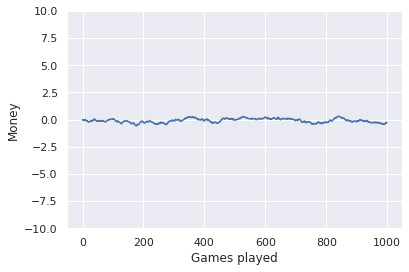

In [3]:
P = 0.5
N_PLAYS = 1000
N_GAMES = 1000

## Defining the player's balance
balance = 0
balance_v = np.zeros(N_PLAYS)

# Now we simply play the same game but multiple times and take the
# average for each turn
for i in range(N_PLAYS):
  balance_v[i] = balance
  for j in range(N_GAMES):
    if (P > np.random.uniform(low=0.0, high=1.0)):
      balance += 1.0 / N_GAMES
    else:
      balance -= 1.0 / N_GAMES

# Now lets plot it and see the end result:
x = np.arange(N_PLAYS)
plt.plot(x, balance_v)
plt.xlabel("Games played")
plt.ylabel("Money")
plt.ylim(-10, 10)
plt.show()

Now we can see the average money earned (or lost) per turn in this game in close to 0. Try tweaking some of the variables and running it for some interesting results.

However if we want an even more interesting result we could simply repeat the whole game itself instead of repeating the turns. Let's take a look at the end result:

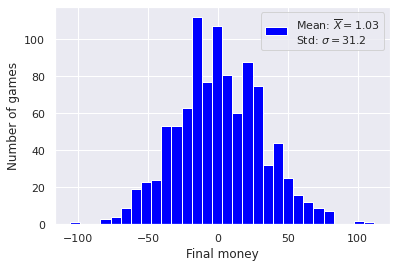

In [4]:
P = 0.5
N_PLAYS = 1000
N_GAMES = 1000
## This time we are taking the final balance for each game
final_balance_v = np.zeros(N_GAMES)

# Repeat the whole game multiple times
for j in range(N_GAMES):
  ## Resetting player balance
  balance = 0
  for i in range(N_PLAYS):
    if (P > np.random.uniform(low=0.0, high=1.0)):
      balance += 1
    else:
      balance -= 1
    
  # Saving result at the end of the game
  final_balance_v[j] = balance

# Calculating the mean and standard deviation for the result
mean = np.mean(final_balance_v)
std = np.std(final_balance_v)

# Now we plot the final balance as a histogram
plt.hist(final_balance_v, bins = 30, label="Mean: $\overline{X} = $"+str(round(mean,2))+"\nStd: $\sigma = $"+str(round(std,2)), color='blue')
plt.xlabel("Final money")
plt.ylabel("Number of games")
plt.legend()
plt.show()

So the end result is more or less a Bell curve centered around zero (at least for the case in with $P = 50\%$). Again, try changing nome of the parameters to see if you get any different result.

In statistical therms what we had was a **binomial distribution**, and the **central limit theorem** is what guarantees us this result (you can read more about it [here](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html)).


### Bonus
  Try combining the two methods! That is, take the end result for a given number of games AND repeat each turn of these games a given number of times and see if anything changes. That might take a while to run depending on the numbers you choose.


Now we can start exploring said paradox. First, take a game just like the one we were playing previously, but slightly reduce the change of winnig. $P = 49.5 \%$ will be enought. Let's take a look at the end result:

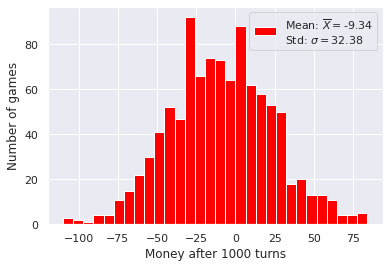

In [5]:
P = 0.495
N_PLAYS = 1000
N_GAMES = 1000
## This time we are taking the final balance for each game
final_balance_v = np.zeros(N_GAMES)

# Repeat the whole game multiple times
for j in range(N_GAMES):
  ## Resetting player balance
  balance = 0
  for i in range(N_PLAYS):
    if (P > np.random.uniform(low=0.0, high=1.0)):
      balance += 1
    else:
      balance -= 1
    
  # Saving result at the end of the game
  final_balance_v[j] = balance

# Calculating the mean and standard deviation for the result
mean = np.mean(final_balance_v)
std = np.std(final_balance_v)

# Plotting the final balance as a histogram
plt.hist(final_balance_v, bins = 30, label="Mean: $\overline{X} = $"+str(round(mean,2))+"\nStd: $\sigma = $"+str(round(std,2)), color='red')
plt.xlabel("Money after " + str(N_PLAYS) + " turns")
plt.ylabel("Number of games")
plt.legend()
plt.show()

We can see by the mean that we are losing money more often than winning, like expected. 

Now we define another game in which if you have an amount of money that is a multiple of $3$, your probaility of winnig is only $9.5\%$, however if you don't, you get a $74.5\%$ chance of victory. This time it is a little trickier to evaluate whether or not the odds are stacked against us. We discussed more about this [here](), where we apply Markov chains to shed some light on this problem. However we can also replicate this result numerically:

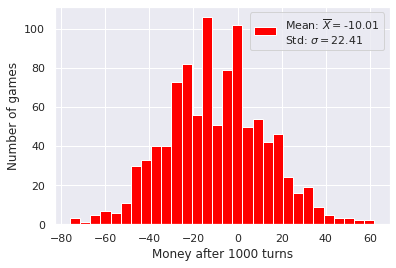

In [6]:
# Deffining probabilities
P1 = 0.095
P2 = 0.745

N_PLAYS = 1000
N_GAMES = 1000
## Taking the final balance for each game
final_balance_v = np.zeros(N_GAMES)

# Repeat the whole game multiple times
for j in range(N_GAMES):
  ## Resetting player balance
  balance = 0
  for i in range(N_PLAYS):
    # Checking if the balance is a multiple of 3 (play the bad game)
    if (balance%3 == 0):
      P = P1
    # Playing the good game  
    else:
      P = P2
    if (P > np.random.uniform(low=0.0, high=1.0)):
      balance += 1
    else:
      balance -= 1

  # Saving result at the end of the game
  final_balance_v[j] = balance

# Calculating the mean and standard deviation for the result
mean = np.mean(final_balance_v)
std = np.std(final_balance_v)

# Plotting the final balance as a histogram
plt.hist(final_balance_v, bins = 30, label="Mean: $\overline{X} = $"+str(round(mean,2))+"\nStd: $\sigma = $"+str(round(std,2)), color='red')
plt.xlabel("Money after " + str(N_PLAYS) + " turns")
plt.ylabel("Number of games")
plt.legend()
plt.show()

So, still a losing game at the long run, but now comes the intesting part. 

What Parrondo's paradox states is that, if played at **any** sequence, the first and second game together result in a **winning game**! Let us test this out:

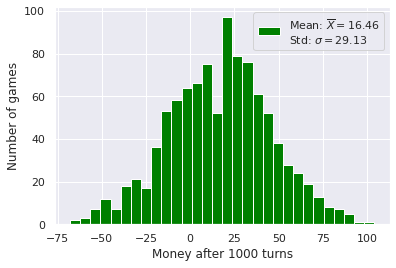

In [7]:
# First define the variable that will determine weather we are playing 
# game A or B for the turn. I will define an equal chance of playing 
# any of the two games
GAME_PROB = 0.5

# Deffining probabilities
## For game A
P_A = 0.495
## For both cases of game B
P_B1 = 0.095
P_B2 = 0.745

N_PLAYS = 1000
N_GAMES = 1000
## Taking the final balance for each game
final_balance_v = np.zeros(N_GAMES)

# Repeat the whole game multiple times
for j in range(N_GAMES):
  ## Resetting player balance
  balance = 0
  for i in range(N_PLAYS):
    # Checkign which game we are playing
    if (GAME_PROB > np.random.uniform(low=0.0, high=1.0)):
      # Playing game B
      # Checking if the balance is a multiple of 3 (play the bad game)
      if (balance%3 == 0):
        P = P_B1
      # Playing the good game  
      else:
        P = P_B2
    else:
      # Playing game A
      P = P_A

    if (P > np.random.uniform(low=0.0, high=1.0)):
      balance += 1
    else:
      balance -= 1

  # Saving result at the end of the game
  final_balance_v[j] = balance

# Calculating the mean and standard deviation for the result
mean = np.mean(final_balance_v)
std = np.std(final_balance_v)

# Plotting the final balance as a histogram
plt.hist(final_balance_v, bins = 30, label="Mean: $\overline{X} = $"+str(round(mean,2))+"\nStd: $\sigma = $"+str(round(std,2)), color='green')
plt.xlabel("Money after " + str(N_PLAYS) + " turns")
plt.ylabel("Number of games")
plt.legend()
plt.show()

**And suddenly we are winnig!** Let's check this out as an average balance per turn now:

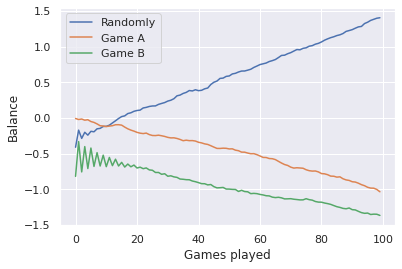

In [8]:
# First define the variable that will determine weather we are playing 
# game A or B for the turn. I will define an equal chance of playing 
# any of the two games
GAME_PROB = 0.5

# Deffining probabilities
## For game A
P_A = 0.495
## For both cases of game B
P_B1 = 0.095
P_B2 = 0.745

N_PLAYS = 100
N_GAMES = 10000

# Now taking the average balance for each turn

## For games A and B played randomly, just A and just B
(balance_v_AB, balance_v_A, balance_v_B) = np.zeros((3, N_PLAYS, N_GAMES))

# Playing game A
for i in range(N_PLAYS):
  for j in range(N_GAMES):
    P = P_A
    if (P > np.random.uniform(low=0.0, high=1.0)):
      balance_v_A[i, j] += 1
    else:
      balance_v_A[i, j] -= 1
    if (i != N_PLAYS-1):
      balance_v_A[i+1, j] +=  balance_v_A[i, j]

# Playing game B
for i in range(N_PLAYS):
  for j in range(N_GAMES):
    # Checking if the balance is a multiple of 3 (play the bad game)
    if (balance_v_B[i, j]%3 == 0):
      P = P_B1
    # Playing the good game  
    else:
        P = P_B2

    if (P > np.random.uniform(low=0.0, high=1.0)):
      balance_v_B[i, j] += 1
    else:
      balance_v_B[i, j] -= 1
    if (i != N_PLAYS-1):
      balance_v_B[i+1, j] +=  balance_v_B[i, j]

# Playing games A and B randomly
for i in range(N_PLAYS):
  for j in range(N_GAMES):
    if (GAME_PROB > np.random.uniform(low=0.0, high=1.0)):
      # Playing game B
      # Checking if the balance is a multiple of 3 (play the bad game)
      if (balance_v_AB[i, j]%3 == 0):
        P = P_B1
      # Playing the good game  
      else:
        P = P_B2
    else:
      # Playing game A
      P = P_A

    if (P > np.random.uniform(low=0.0, high=1.0)):
      balance_v_AB[i, j] += 1
    else:
      balance_v_AB[i, j] -= 1
    if (i != N_PLAYS-1):
      balance_v_AB[i+1, j] +=  balance_v_AB[i, j]

# Obtaining the average balance per turn for all games played
average_balance_v_AB = np.mean(balance_v_AB, axis=1)
average_balance_v_A = np.mean(balance_v_A, axis=1)
average_balance_v_B = np.mean(balance_v_B, axis=1)

# Now lets plot it and see the end result:
x = np.arange(N_PLAYS)
plt.plot(x, average_balance_v_AB, label="Randomly")
plt.plot(x, average_balance_v_A, label="Game A")
plt.plot(x, average_balance_v_B, label="Game B")
plt.xlabel("Games played")
plt.ylabel("Balance")
plt.legend()
plt.show()

And we've just replicated a [*Nature magazine*'s article results](https://www.nature.com/articles/47220)! 
